# DiploDatos 2019 - Análisis de Series Temporales

## Integrantes

| Nombre | e-mail |
|------|------|
|Rivadero, Isabel | isarivadero@hotmail.com |
|Vargas, Miguel | lvc0107@protonmail.com |
|Mancuso, Fernando | manquius@gmail.com |

## Práctico de Análisis y Curación de datos

En este práctico  continuaremos analizando el dataset más en detalle y tomaremos
acciones de limpieza y curación sobre los datos cuando sea necesario

### Dataset

In [2]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(rc={'figure.figsize':(10,6)})

cols = ['service',
        'sender_zipcode',
        'receiver_zipcode',
        'sender_state',
        'receiver_state',
        'shipment_type',
        'quantity',
        'status',
        'date_created',
        'date_sent',
        'date_visit',
        'target']
cols_holidays = ['holiday', 
                 'description']
data_path = './shipments_BR_201903.csv'
holidays = './holidays.csv'

In [4]:
df = pd.read_csv(data_path, usecols=cols)
df.shape

(1000000, 12)

In [5]:
df.head()

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,target
0,SP,3005,SP,5409,express,1,0,done,2019-03-04 00:00:00,2019-03-05 13:24:00,2019-03-07 18:01:00,2
1,SP,17052,MG,37750,standard,1,1,done,2019-03-19 00:00:00,2019-03-20 14:44:00,2019-03-27 10:21:00,5
2,SP,2033,SP,11040,express,1,0,done,2019-02-18 00:00:00,2019-02-21 15:08:00,2019-02-28 18:19:00,5
3,SP,13900,SP,18500,express,1,0,done,2019-03-09 00:00:00,2019-03-11 15:48:00,2019-03-12 13:33:00,1
4,SP,4361,RS,96810,express,1,0,done,2019-03-08 00:00:00,2019-03-12 08:19:00,2019-03-16 08:24:00,4


#### Referencia de las columnas
* **service**: Identificador unico que corresponde a un tipo de servicio de un correo en particular.
* **sender_zipcode:** Código postal de quien envía el paquete (usualmente el vendedor).
* **receiver_zipcode:** Código postal de quien recibe el paquete (usualmente el comprador).
* **sender_state:** Nombre abreviado del estado de quien envía el paquete.
* **receiver_state:** Nombre abreviado del estado de quien recibe el paquete.
* **quantity:** Cantidad de items que tiene dentro el paquete.
* **status:** Estado final del envío.
* **date_created:** Fecha de compra de el o los items.
* **date_sent:** Fecha en que el correo recibe el paquete.
* **date_visit:** Fecha en que el correo entrega el paquete.
* **target:** Cantidad de dias hábiles que tardó el correo en entregar el paquete desde que lo recibe.


In [6]:
# set seed for reproducibility
np.random.seed(0)

In [7]:
df.sample(5)

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,target
157105,SP,14405,MG,37706,standard,2,3,done,2019-03-13 00:00:00,2019-03-19 20:52:00,2019-03-22 11:00:00,3
374554,BA,40260,SE,49088,standard,1,1,done,2019-03-04 00:00:00,2019-03-06 15:32:00,2019-03-23 11:23:00,12
688694,SP,8061,DF,70236,express,1,0,done,2019-03-15 00:00:00,2019-03-15 16:04:00,2019-03-18 12:00:00,1
265381,SP,3118,BA,48455,standard,3,1,done,2019-03-10 00:00:00,2019-03-11 14:58:00,2019-03-27 07:56:00,12
955415,SP,14402,DF,71503,standard,1,4,done,2019-03-01 00:00:00,2019-03-07 03:55:36,2019-03-11 16:39:00,1


In [8]:
df.dtypes

sender_state        object
sender_zipcode       int64
receiver_state      object
receiver_zipcode     int64
shipment_type       object
quantity             int64
service              int64
status              object
date_created        object
date_sent           object
date_visit          object
target               int64
dtype: object

Implementación
Como primer paso es necesario verificar la consistencia de la información.
Para esto debemos verificar al menos lo siguiente:

1- ¿Los ids son únicos?

no entiendo a que se refiere con ids unicos??a las columnas??

2- Si no tuviéramos estos índices, ¿tenemos información para construir una clave
primaria?

3- ¿Tenemos datos faltantes? Dar detalles.

In [13]:
for col in df.columns:
    print(col)
    print(df[col].isna().value_counts())
    print('='*20)

sender_state
False    1000000
Name: sender_state, dtype: int64
sender_zipcode
False    1000000
Name: sender_zipcode, dtype: int64
receiver_state
False    1000000
Name: receiver_state, dtype: int64
receiver_zipcode
False    1000000
Name: receiver_zipcode, dtype: int64
shipment_type
False    1000000
Name: shipment_type, dtype: int64
quantity
False    1000000
Name: quantity, dtype: int64
service
False    1000000
Name: service, dtype: int64
status
False    1000000
Name: status, dtype: int64
date_created
False    1000000
Name: date_created, dtype: int64
date_sent
False    1000000
Name: date_sent, dtype: int64
date_visit
False    1000000
Name: date_visit, dtype: int64
target
False    1000000
Name: target, dtype: int64


Como podemos observar no tenemos datos faltantes ya que en cada una de las columnas todos los valores que devuelve isna() son false.

4- ¿Tenemos datos inconsistentes o raros? Dar detalles.

comencemos viendo que el target sea positivo o cero

In [15]:
(df['target']<0).value_counts()


False    1000000
Name: target, dtype: int64

Como podemos ver se tratan todos de valores positivos o iguales a cero.

In [23]:
df1=df.copy()
df1['date_created'] = pd.to_datetime(df1['date_created'])
df1['date_sent'] = pd.to_datetime(df1['date_sent'])
df1['date_visit'] = pd.to_datetime(df1['date_visit'])

In [35]:
(df1['date_visit'] > df1['date_created']).value_counts()

True     999832
False       168
dtype: int64

Con esto podemos observar cuantos valores hay en donde no se cumple que la fecha de entrega debe ser mayor que la fecha de compra. En específico, se trata de 168 fechas que no cumplen.

In [36]:
(df1['date_visit'] > df1['date_sent']).value_counts()

True     999939
False        61
dtype: int64

Con esto podemos observar cuantos valores hay en donde no se cumple que la fecha de entrega debe ser mayor que la fecha en que el correo recibe el paquete. En específico, se trata de 61 fechas que no cumplen.

In [37]:
(df1['date_sent'] > df1['date_created']).value_counts()

True     999829
False       171
dtype: int64

Con esto podemos observar cuantos valores hay en donde no se cumple que la fecha en que el correo recibe el paquete debe ser mayor que la fecha de compra. En específico, se trata de 171 fechas que no cumplen este requisito.


In [50]:
df1[((df1['date_visit'] <= df1['date_created']) | (df1['date_visit'] <= df1['date_sent']) ) |  (df1['date_sent'] <= df1['date_created'])]

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,target
8622,SP,1521,DF,72504,standard,1,7,done,2019-06-27,2019-02-06 10:41:00,2019-03-06 14:18:00,17
10681,SP,3822,PE,51200,standard,1,4,sent,2019-06-18,2019-03-06 13:00:00,2019-03-06 13:24:00,0
13241,SP,14405,DF,71699,standard,1,7,done,2019-06-20,2019-03-06 05:17:00,2019-03-06 13:17:00,0
13295,SP,15820,MS,79011,express,1,7,done,2019-06-18,2019-02-06 11:34:00,2019-03-06 13:28:00,17
13446,SP,9961,SP,18125,standard,1,4,sent,2019-06-28,2019-02-06 03:43:00,2019-03-06 10:49:00,17
16031,SP,3064,RJ,22743,standard,1,7,done,2019-06-26,2019-02-06 06:02:00,2019-03-06 15:05:00,17
17562,SP,7411,MG,36220,standard,1,7,done,2019-06-17,2019-02-06 09:21:00,2019-03-06 12:03:00,17
27260,SP,18111,RS,96930,standard,2,4,sent,2019-06-26,2019-02-06 04:15:00,2019-03-06 11:28:00,17
34408,SP,7756,RJ,21330,express,1,7,done,2019-06-26,2019-02-06 06:00:00,2019-03-06 17:23:00,17
35609,SP,1207,SP,13216,express,4,4,sent,2019-06-16,2019-03-06 07:05:00,2019-03-06 07:07:00,0


Entonces podemos decir que son 191 filas las que no cumplen alguna de las tres condiciones.

5-¿Tenemos outliers muy lejanos? ¿Conviene quitarlos del dataset?

{'whiskers': [<matplotlib.lines.Line2D at 0x7efd20f16f28>,
 'caps': [<matplotlib.lines.Line2D at 0x7efd20f1f908>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efd20f16dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x7efd20f1fda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efd20f283c8>],
 'means': []}

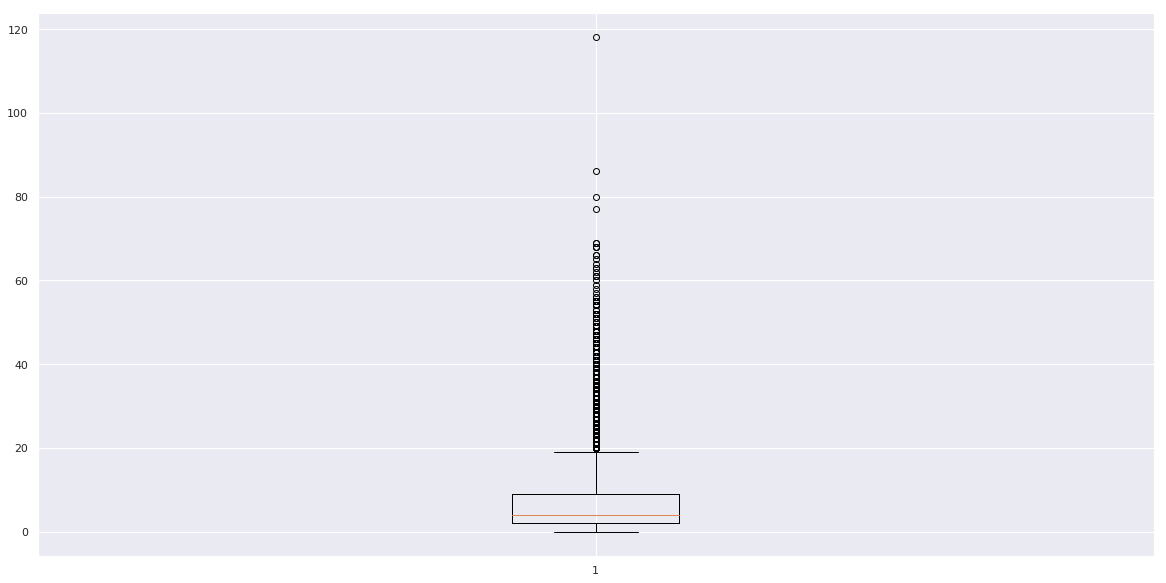

In [59]:
plt.figure(figsize=(20,10))
plt.boxplot(df['target'])

In [71]:
df['target'].quantile(np.arange(0.1,1.1,0.1))

0.1      1.0
0.2      2.0
0.3      2.0
0.4      3.0
0.5      4.0
0.6      6.0
0.7      8.0
0.8     10.0
0.9     13.0
1.0    118.0
Name: target, dtype: float64

In [72]:
df['target'].quantile(np.arange(0.9,1.01,0.01))

0.90     13.0
0.91     14.0
0.92     14.0
0.93     15.0
0.94     15.0
0.95     16.0
0.96     17.0
0.97     18.0
0.98     20.0
0.99     22.0
1.00    118.0
Name: target, dtype: float64

los target con un valor  menor que 22 ocupan el 99 por ciento de los datos. Los valores mayores a este valor deberiamos quitarlos ya que nos son representativos, los consideramos outliers.

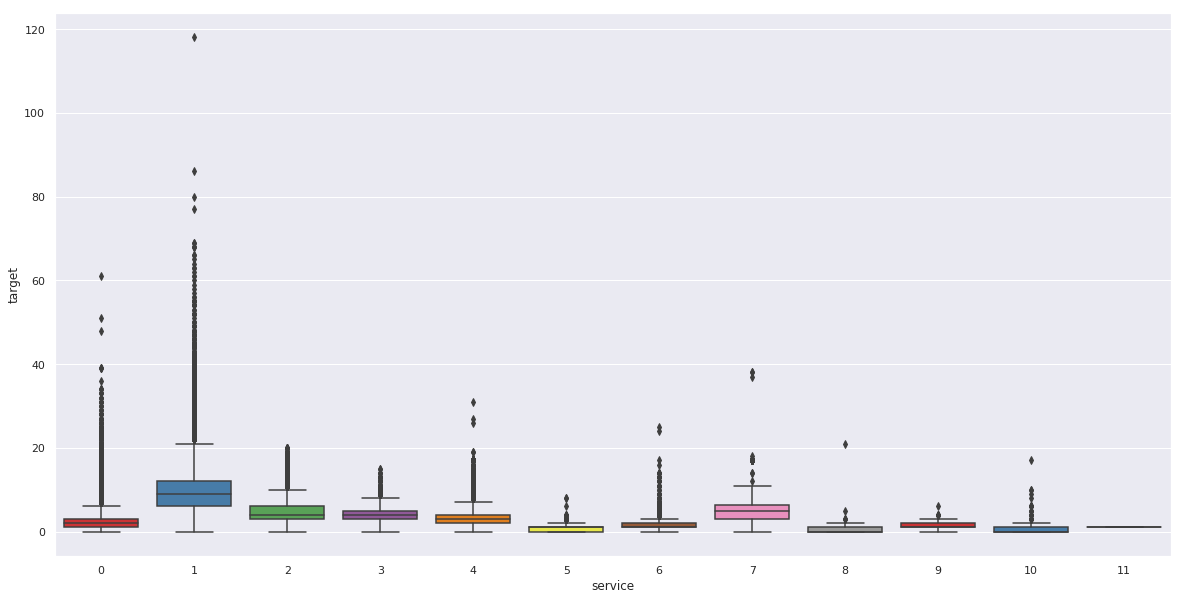

In [75]:
plt.figure(figsize=(20, 10))
sb.set(rc={'figure.figsize':(10.5,8.5)})
sb.boxplot(x=df['service'], y=df['target'], data=df, palette="Set1")

Con esto vemos los outliers por servicio.

6- ¿Las fechas tienen sentido? Dar detalles.

### sería lo mismo que dijimos en el punto 4

7- ¿Que otras verificaciones básicas podrías hacer?

### no se me ocurrio otra verificacion que hacer

a-¿Como se podría imputar las fechas faltantes de la columna ​ date_sent​ ? Justificarlo e
implementar alguna solución.

b-¿Qué riesgos existen al imputar datos? ¿Qué riesgos existen al imputar estos en particular?
¿Cómo corregirías las fechas inconsistentes? Implementar alguna solución

los riesgos de imputar datos son que estamos creando informacion que no existe (estamos manipulando datos que no tenemos la certeza de que sean parecidos a los reales).

c-¿Es conveniente aplicar normalización o estandarización sobre algunos features? ¿Cuales
features? ¿Porqué?

d-¿Qué técnica utilizarías? Implementar alguna solución.

e-¿Es necesario reducir la dimensión de los features?

f-¿Sería útil aplicar el algoritmo de PCA? ¿Sobre qué features? ¿Con qué objetivo?

g-Actualmente el target tiene granularidad de días, ¿lo podrías refinar? ¿Como? ¿Qué
beneficios obtendrías al aumentar la granularidad?